In [8]:
def plot_landscape(landscape, max_gamma, max_beta, min_gamma, min_beta, scatterpoints=None):
    ax = plt.imshow(landscape)
    if scatterpoints is None:
        scatterpoints = []
    for scatterpoint in scatterpoints:
        plt.scatter(scatterpoint[0][1], scatterpoint[0][0], c=scatterpoint[1], s=100, marker='*', label=scatterpoint[2])
    plt.legend()
    ax.figure.canvas.draw()

    subplot = ax.figure.get_axes()[0]

    ticks = subplot.get_xticklabels()
    scale = 1/max([float(tick.get_text().replace('−', '-')) for tick in ticks if tick.get_text() != ''])
    scale *= max_gamma - min_gamma
    for tick in ticks:
        if tick.get_text() != '':
            tick.set_text(round(scale * float(tick.get_text().replace('−', '-')) - max_gamma, 2))
        subplot.set_xticklabels(ticks)

    ticks = subplot.get_yticklabels()
    scale = 1 / max([float(tick.get_text().replace('−', '-')) for tick in ticks if tick.get_text() != ''])
    scale *= max_beta - min_beta
    for tick in ticks:
        if tick.get_text() != '':
            # This doesn't behave properly, AFAICT
            tick.set_text(-1 * round(2 * scale * float(tick.get_text().replace('−', '-')) - max_beta, 2))
        subplot.set_yticklabels(ticks)

    plt.ylabel(r"$\beta$")
    plt.xlabel(r"$\gamma$")

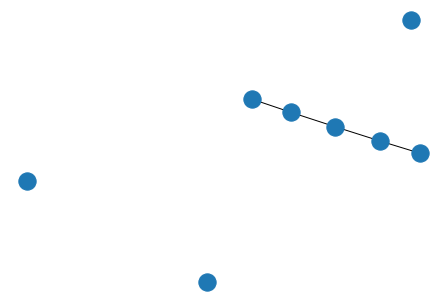

No handles with labels found to put in legend.
<ipython-input-8-beb6eb595aaf>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  subplot.set_xticklabels(ticks)
<ipython-input-8-beb6eb595aaf>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  subplot.set_yticklabels(ticks)


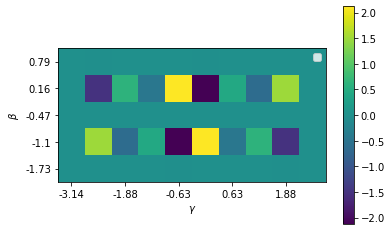

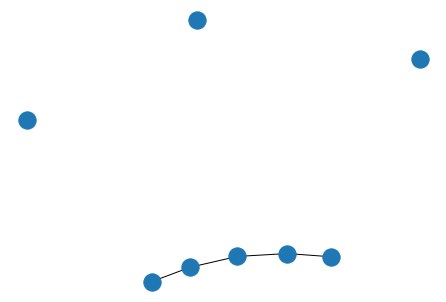

No handles with labels found to put in legend.


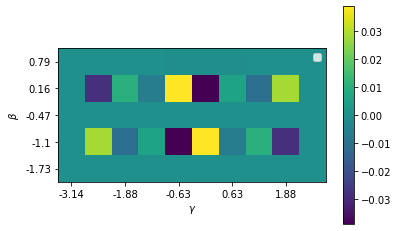

In [16]:
from classical_optimization.terra.utils import read_graph
import networkx as nx
import os
import matplotlib.pyplot as plt
from networkx.algorithms.connectivity.cuts import minimum_edge_cut

for addon in ['hari', 'harinoisy']:
    path = '../../' + addon
    all_data = {}
    qubit_numbers = [8]
    num_qubits = 8
    folder = '8_graphs'
    graph_file = 'dbdfce81c645c9b4635f31548144fc82.pkl'
    graph_data = read_graph(os.path.join(path, folder, graph_file))
    graph = graph_data['graph']
    nx.draw(graph)
    plt.show()
    extant_data = all_data.get(num_qubits, [])
    extant_data.append(graph_data)
    for k in graph_data.keys():
        if 'landscape' in k and 'time' not in k:
            _, disc, max_beta, max_gamma, min_beta, min_gamma = k.split('_')
            disc = int(disc[1:])
            if disc == 5:
                max_beta = float(max_beta[1:])
                min_beta = float(min_beta[1:])
                max_gamma = float(max_gamma[1:])
                min_gamma = float(min_gamma[1:])
                landscape = graph_data[k]
    plot_landscape(landscape, max_gamma, max_beta, min_gamma, min_beta, [])  
    plt.colorbar()
    plt.show()


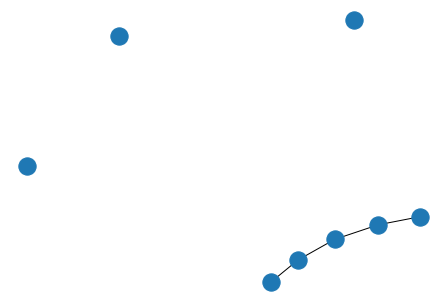

In [109]:
import networkx as nx
nx.draw(graph_data['graph'])